In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from nltk.sentiment import SentimentIntensityAnalyzer
from nlp_id.postag import PosTag
import gensim
import time
import matplotlib.pyplot as plt
import pyLDAvis.gensim_models
from wordcloud import WordCloud
from collections import Counter
import matplotlib.colors as mcolors

In [2]:
# Import the twitter the cleaned file 'twittercleaned.csv'
df = pd.read_csv('assets/data_folder/twittercleaned.csv')

In [3]:
# Create a sentiment analyzer object
analyzer = SentimentIntensityAnalyzer()

# Define a function to get the sentiment scores for a single sentence
def get_sentiment_scores(sentence):
    scores = analyzer.polarity_scores(sentence)
    return scores

# Apply the sentiment analysis function to the entire column
df['Sentiment_Score'] = df['Text_Translated'].apply(get_sentiment_scores)

# Extract the individual sentiment scores as separate columns
df['Negative_Score'] = df['Sentiment_Score'].apply(lambda x: x['neg'])
df['Neutral_Score'] = df['Sentiment_Score'].apply(lambda x: x['neu'])
df['Positive_Score'] = df['Sentiment_Score'].apply(lambda x: x['pos'])
df['Compound_Score'] = df['Sentiment_Score'].apply(lambda x: x['compound'])

In [4]:
df

,Datetime,Text,Keyword,Text_Processed,Language,Text_Translated,Sentiment_Score,Negative_Score,Neutral_Score,Positive_Score,Compound_Score
0,2015-12-28 18:00:42+00:00,Mencari perbandingan RUU KUHP &amp; KUHP!,RUU KUHP,cari banding rancangan undang undang kuhp amp ...,id,search for appeals of the draft law on the Cri...,"{'neg': 0.382, 'neu': 0.618, 'pos': 0.0, 'comp...",0.382,0.618,0.000,-0.7783
1,2015-12-23 02:03:39+00:00,Stadium General: Perkembangan dan Masa Depan P...,RUU KUHP,stadium general kembang susun rancangan undang...,id,General Kembang Stadium drafts the Criminal Co...,"{'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'comp...",0.167,0.833,0.000,-0.5267
2,2015-12-20 05:04:17+00:00,Rechtelijk Pardon di #RUUKUHP tidak tepat dite...,RUU KUHP,rechtelijk pardon terjemah maaf adil terjemah ...,id,"rechtelijk pardon translation of sorry, fair, ...","{'neg': 0.084, 'neu': 0.323, 'pos': 0.594, 'co...",0.084,0.323,0.594,0.7845
3,2015-12-19 10:05:37+00:00,Kapan RUU KUHP kita di sahkan????,RUU KUHP,rancangan undang undang kuhp sahkan,id,the draft criminal code law is ratified,"{'neg': 0.34, 'neu': 0.5, 'pos': 0.16, 'compou...",0.340,0.500,0.160,-0.4215
4,2015-12-19 09:48:27+00:00,"@SoundOfYogi udah ga ada mit, dicabut mk, tapi...",RUU KUHP,sudah tidak mit pergi mk rancangan undang unda...,id,I can't go anymore now that the draft Criminal...,"{'neg': 0.236, 'neu': 0.764, 'pos': 0.0, 'comp...",0.236,0.764,0.000,-0.5267
...,...,...,...,...,...,...,...,...,...,...,...
6413,2023-02-13 08:26:22+00:00,@ediwanqu Betul...jangan sampai menunggu revis...,revisi RKUHP,tunggu revisi undang undang rkuhp laku 3 lagi,id,Wait for the revision of the RKUHP law to take...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
6414,2023-02-06 17:45:13+00:00,Yang jelas akan melebihi apa yang terjadi dala...,revisi RKUHP,aksi tolak rkuhp 2019 revisi undang undang kom...,id,"action to reject the 2019 RKUHP, revision of t...","{'neg': 0.119, 'neu': 0.881, 'pos': 0.0, 'comp...",0.119,0.881,0.000,-0.4019
6415,2023-01-29 03:00:30+00:00,Revisi RKUHP tidak mudah tapi tetap kita dukun...,revisi RKUHP,revisi rkuhp mudah dukung rkuhp adil rfbrsltbmo,id,Easy RKUHP revision supports fair RKUHP RFBRSL...,"{'neg': 0.0, 'neu': 0.342, 'pos': 0.658, 'comp...",0.000,0.342,0.658,0.7717
6416,2023-01-13 06:38:09+00:00,KUHP Baru Sangat Baik.. Revisi RKUHP tidak mud...,revisi RKUHP,kuhp revisi rkuhp mudah dukung,id,The revised Criminal Code is easy to support,"{'neg': 0.243, 'neu': 0.357, 'pos': 0.4, 'comp...",0.243,0.357,0.400,0.2960


In [5]:
# Define a function to give the value of the sentiments based off the score
def interpret_sentiment(compound_score):
    if compound_score < 0.0:
        return 'Negative'
    elif compound_score == 0.0:
        return 'Neutral'
    else:
        return 'Positive'

# Apply the function
df['Sentiment'] = df['Compound_Score'].apply(interpret_sentiment)
# Drop any neutral sentiments
df = df[df['Sentiment'] != 'Neutral']
df = df.reset_index(drop=True)

In [6]:
# Create a pos tagger object
postagger = PosTag() 

# Define a function for pos tagging
def pos_tagging(tokens):
    return postagger.get_pos_tag(tokens)

# Apply the function to the 'Text_Processed' (The pos tagger automatically tokenizes the text first)
df['POS_Tags'] = df['Text_Processed'].apply(pos_tagging)

C:\Users\bukan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator DictVectorizer from version 0.22 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\bukan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\bukan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 

In [7]:
saring=[]

# Filter out any pos tags beside 'NN' and 'VB'
for i in df['POS_Tags'] :
    sar=[word[0] for word in i if word[1] in ['NN', 'VB']]
    saring.append(sar)

# Insert a column containing the filtered pos tags
df['final'] = saring

In [8]:
# Delete any empty values in 'final'
df = df[df['final'].map(lambda d: len(d)) > 0]

In [9]:
# Convert the 'final' column of the DataFrame to a list of texts
text_data = df['final'].tolist()

# Create a Gensim dictionary from the list of texts
dictionary = gensim.corpora.Dictionary(text_data)

# Convert the list of texts into a bag-of-words corpus
corpus = [dictionary.doc2bow(tokens) for tokens in text_data]
# Create a TF-IDF model from the corpus
tfidf = gensim.models.TfidfModel(corpus)
# Apply the TF-IDF model to the corpus to create a new corpus with TF-IDF weights
corpus_tfidf = tfidf[corpus]

In [10]:
coherence = []

# Loop through a range of values for k (number of topics)
for k in range(2,10):
    # Initialize an LDA model with the specified number of topics
    Lda = gensim.models.ldamodel.LdaModel
    ldamodel = Lda(corpus_tfidf, num_topics=k, id2word = dictionary,
                    chunksize = 12000,random_state=100, per_word_topics=True)
    # Calculate the coherence value for the current number of topics
    cm = gensim.models.coherencemodel.CoherenceModel(model=ldamodel, texts=text_data, 
                                                     dictionary=dictionary, coherence='c_v')
    coherence.append((k,cm.get_coherence()))

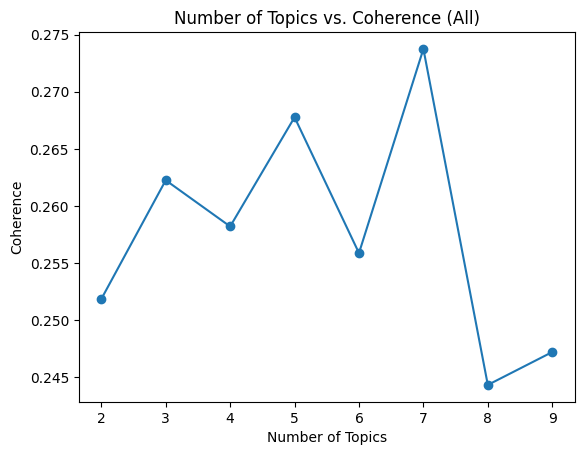

In [11]:
x_val = [x[0] for x in coherence]
y_val = [x[1] for x in coherence]
plt.plot(x_val,y_val)
plt.scatter(x_val,y_val)
plt.rcParams["figure.figsize"] = (10,10)
plt.title('Number of Topics vs. Coherence (All)')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence')
plt.xticks(x_val)
plt.show()

In [12]:
pyLDAvis.enable_notebook()

finalLdamodel = Lda(corpus_tfidf, num_topics=4, id2word = dictionary,
                    chunksize = 12000,random_state=100, per_word_topics=True)

vis = pyLDAvis.gensim_models.prepare(finalLdamodel, corpus_tfidf
                                     , dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.004527 -0.020396       1        1  27.353763
1     -0.015898  0.042292       2        1  26.724184
3     -0.032043 -0.022732       3        1  24.904238
2      0.043415  0.000836       4        1  21.017815, topic_info=              Term       Freq       Total Category  logprob  loglift
534          kitab  99.000000   99.000000  Default  30.0000  30.0000
34         korupsi  84.000000   84.000000  Default  29.0000  29.0000
36   pemberantasan  64.000000   64.000000  Default  28.0000  28.0000
705           maju  18.000000   18.000000  Default  27.0000  27.0000
33          komisi  74.000000   74.000000  Default  26.0000  26.0000
..             ...        ...         ...      ...      ...      ...
82            atur  10.606886   67.583716   Topic4  -5.8513  -0.2921
40          rakyat  10.046478   67.012084   Topic4  -5.9056  -0.3379
173         revisi  10.761655  111.547951   Topic4  -5.8368  -0.7787
31           dewan   9.484329   58.693062   Topic4  -5.9632  -0.2629
38      perwakilan   9.069545   56.667510   Topic4  -6.0079  -0.2725

[356 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
3325      1  0.502201  abdul
843       1  0.239428  acara
843       2  0.119714  acara
843       3  0.239428  acara
843       4  0.407028  acara
...     ...       ...    ...
833       4  0.283131  zaman
221       1  0.157371   zina
221       2  0.314742   zina
221       3  0.196714   zina
221       4  0.314742   zina

[653 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 4, 3])

In [13]:
def format_topics_sentences(ldamodel=None, corpus=corpus_tfidf, texts=text_data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df._append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=finalLdamodel, corpus=corpus_tfidf, texts=text_data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1,0.7509,"undang, rkuhp, rancangan, kuhp, revisi, hukum,...","[cari, banding, rancangan, undang, undang, kuh..."
1,1,1,0.7937,"undang, rkuhp, rancangan, kuhp, revisi, hukum,...","[general, kembang, susun, rancangan, undang, u..."
2,2,2,0.7372,"undang, kitab, pidana, hukum, pasal, kuhp, rku...","[rechtelijk, pardon, maaf, ampun]"
3,3,0,0.4283,"undang, pidana, hukum, pasal, kuhp, rancangan,...","[rancangan, undang, undang, kuhp, sahkan]"
4,4,1,0.7582,"undang, rkuhp, rancangan, kuhp, revisi, hukum,...","[mit, pergi, mk, rancangan, undang, undang, ku..."
5,5,1,0.7436,"undang, rkuhp, rancangan, kuhp, revisi, hukum,...","[bahas, rancangan, undang, undang, kuhp, seles..."
6,6,1,0.7050,"undang, rkuhp, rancangan, kuhp, revisi, hukum,...","[dimunculin, rancangan, undang, undang, kuhp, ..."
7,7,3,0.8232,"undang, revisi, korupsi, kuhp, komisi, rancang...","[mpm, pp, anggap, bahas, rancangan, undang, un..."
8,8,3,0.6934,"undang, revisi, korupsi, kuhp, komisi, rancang...","[rancangan, undang, undang, kuhp, kabar]"
9,9,1,0.7803,"undang, rkuhp, rancangan, kuhp, revisi, hukum,...","[ngeri, rancangan, undang, undang, kuhp, asusi..."


In [14]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0,0.8977,"undang, pidana, hukum, pasal, kuhp, rancangan, kitab, tindak, rkuhp, korupsi","[neohistorian, salica, kitab, kuhp, jerman, kompilasi, masehi, raja, jerman, franken, klan, mero..."
1,1,0.8718,"undang, rkuhp, rancangan, kuhp, revisi, hukum, pidana, pasal, atur, laku","[narasi, publik, paham, harap, publik, parlemen, ada, kontra, veto, tolak, rancangan, undang, un..."
2,2,0.8881,"undang, kitab, pidana, hukum, pasal, kuhp, rkuhp, masuk, acara, orang","[jokowi, backingan, negara, tegak, hukum, negara, siang, mei, presiden, joko, gelar, rapat, bata..."
3,3,0.8721,"undang, revisi, korupsi, kuhp, komisi, rancangan, pemberantasan, rkuhp, pasal, hukum","[massa, kongres, aliansi, serikat, buruh, ina, kasbi, demo, tolak, knaikan, badan, penyelenggara..."


In [15]:
df_dominant_topic['pre_Text'] = df['Text']

In [16]:
sampled_data = df_dominant_topic.groupby('Dominant_Topic', group_keys=False).apply(lambda x: x.sample(3))

sampled_data

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,pre_Text
5625,5625,0,0.8345,"undang, pidana, hukum, pasal, kuhp, rancangan, kitab, tindak, rkuhp, korupsi","[staf, ahli, menteri, hukum, hak, asasi, manusia, ikan, laksana, tugas, sosialisasi, kuhp, pelit...",Gagasan Rancangan Kitab Undang-undang Hukum Pidana Pertama Kali Dicetuskan Pada 1963 https://t.c...
3629,3629,0,0.7275,"undang, pidana, hukum, pasal, kuhp, rancangan, kitab, tindak, rkuhp, korupsi","[radikal, perspektif, hukum, pidana, prof]","Satu hal yang bikin gue penasaran adalah, gimana caranya biar orang ga main asal prasangka aja. ..."
4277,4277,0,0.8137,"undang, pidana, hukum, pasal, kuhp, rancangan, kitab, tindak, rkuhp, korupsi","[wow, dosen, hukum, pidana, diejek, goblok, hakim, perkara, pidana, sifat, mencari, materil, hak...","@infotwitwor_ Ketika dosen pidana ugm kena labelling, sabar pak @mfatahilahakbar. Fiksi hukum se..."
6070,6070,1,0.7505,"undang, rkuhp, rancangan, kuhp, revisi, hukum, pidana, pasal, atur, laku","[revisi, rkuhp, rupa, proses, ubah, hukum]",Revisi RKUHP Disusun Dengan Nilai-nilai ke Indonesiaan https://t.co/o9PL2UIaKK
2828,2828,1,0.4715,"undang, rkuhp, rancangan, kuhp, revisi, hukum, pidana, pasal, atur, laku","[rezim, menglihkan, isu, lari, dar, ekonomi, peraturan, pemerintah, pengganti, undang, undang, r...",Jadi keinget pernah disetrikain milo sama @revisikuhp wkwkwk
549,549,1,0.8090,"undang, rkuhp, rancangan, kuhp, revisi, hukum, pidana, pasal, atur, laku","[rancangan, undang, undang, mol, hukum, tindak, pidana, belanda, jalan, kuhp, tolak, hukum, pida...",RUU Minol tidak sama dengan hukum tindak pidana Belanda jadi ga sejalan dengan KUHP. @ICJRid men...
3427,3427,2,0.7753,"undang, kitab, pidana, hukum, pasal, kuhp, rkuhp, masuk, acara, orang","[lushiana, dosen, hukum, pidana, fh, uns, giat, korupsi, lushiana, dosen, hu]",Lebih Dekat dengan Lushiana Dosen Hukum Pidana FH UNS Pegiat Antikorupsi https://t.co/p9GsiTppWb...
3580,3580,2,0.7713,"undang, kitab, pidana, hukum, pasal, kuhp, rkuhp, masuk, acara, orang","[tindak, pidana, wilayah, hukum, pekanbaru, has, been, berita]","Sekarang sanksi hukum pidana atau perdata ga lebih berat dari sanksi sosial, kasian jurnalis itu..."
5339,5339,2,0.7459,"undang, kitab, pidana, hukum, pasal, kuhp, rkuhp, masuk, acara, orang","[rkuhp, rancang, kitab, undang, undang, hukum, pidana]",Demo mahasiswa untuk menyuarakan penolakan terhadap Rancangan Kitab Undang-Undang Hukum Pidana (...
1115,1115,3,0.7919,"undang, revisi, korupsi, kuhp, komisi, rancangan, pemberantasan, rkuhp, pasal, hukum","[promosi, jargon, politik, dekolonisasi, cipta, ilusi, kuhp, dasar, upaya]",Mempromosikan jargon politik dekolonisasi dengan menciptakan ilusi bahwa KUHP adalah buatan kolo...


C:\Users\bukan\AppData\Local\Temp\ipykernel_5936\639019663.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_counter.loc[df_counter.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
C:\Users\bukan\AppData\Local\Temp\ipykernel_5936\639019663.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_counter.loc[df_counter.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
C:\Users\bukan\AppData\Local\Temp\ipykernel_5936\639019663.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_counter.loc[df_counter.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
C:\Users\bukan\AppData\Local\Temp\ipykernel_5936\639019663.py:23: UserWarning: set

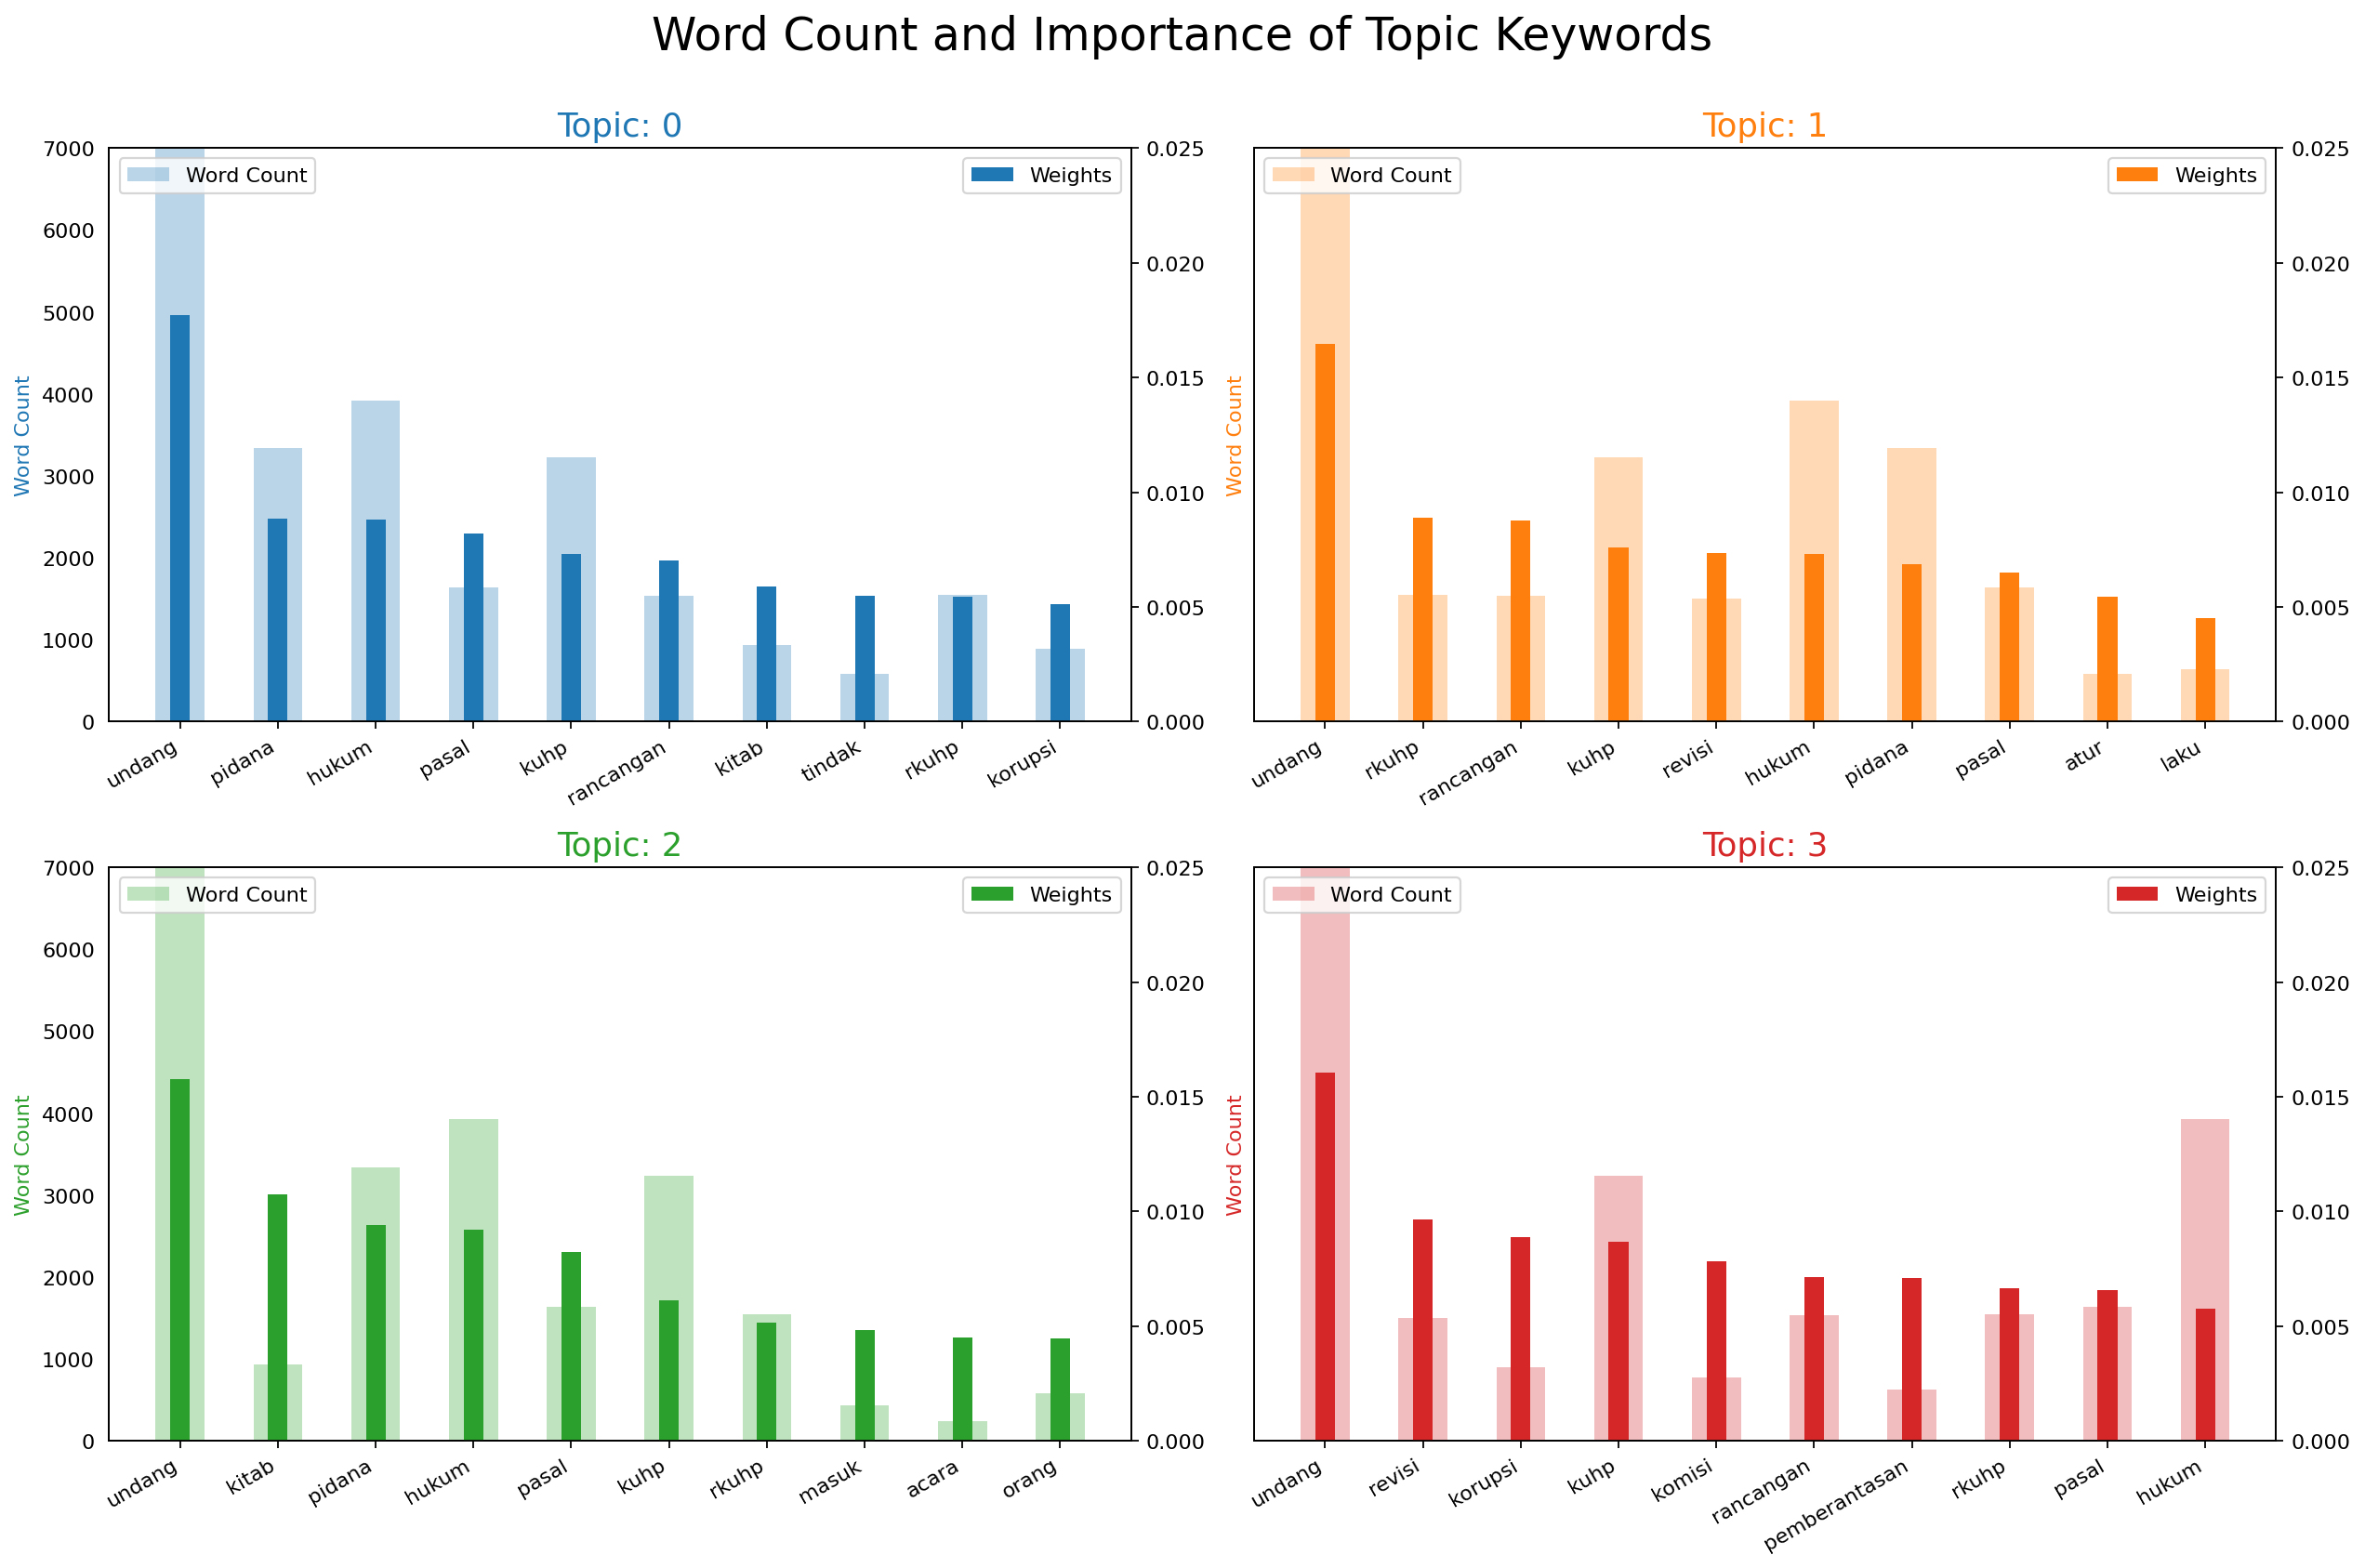

In [17]:
topics = finalLdamodel.show_topics(formatted=False)
data_flat = [w for w_list in text_data for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df_counter = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df_counter.loc[df_counter.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df_counter.loc[df_counter.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.025); ax.set_ylim(0, 7000)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df_counter.loc[df_counter.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout()    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.savefig('assets/images/word_count_importance_topic_keywords.png')
plt.show()

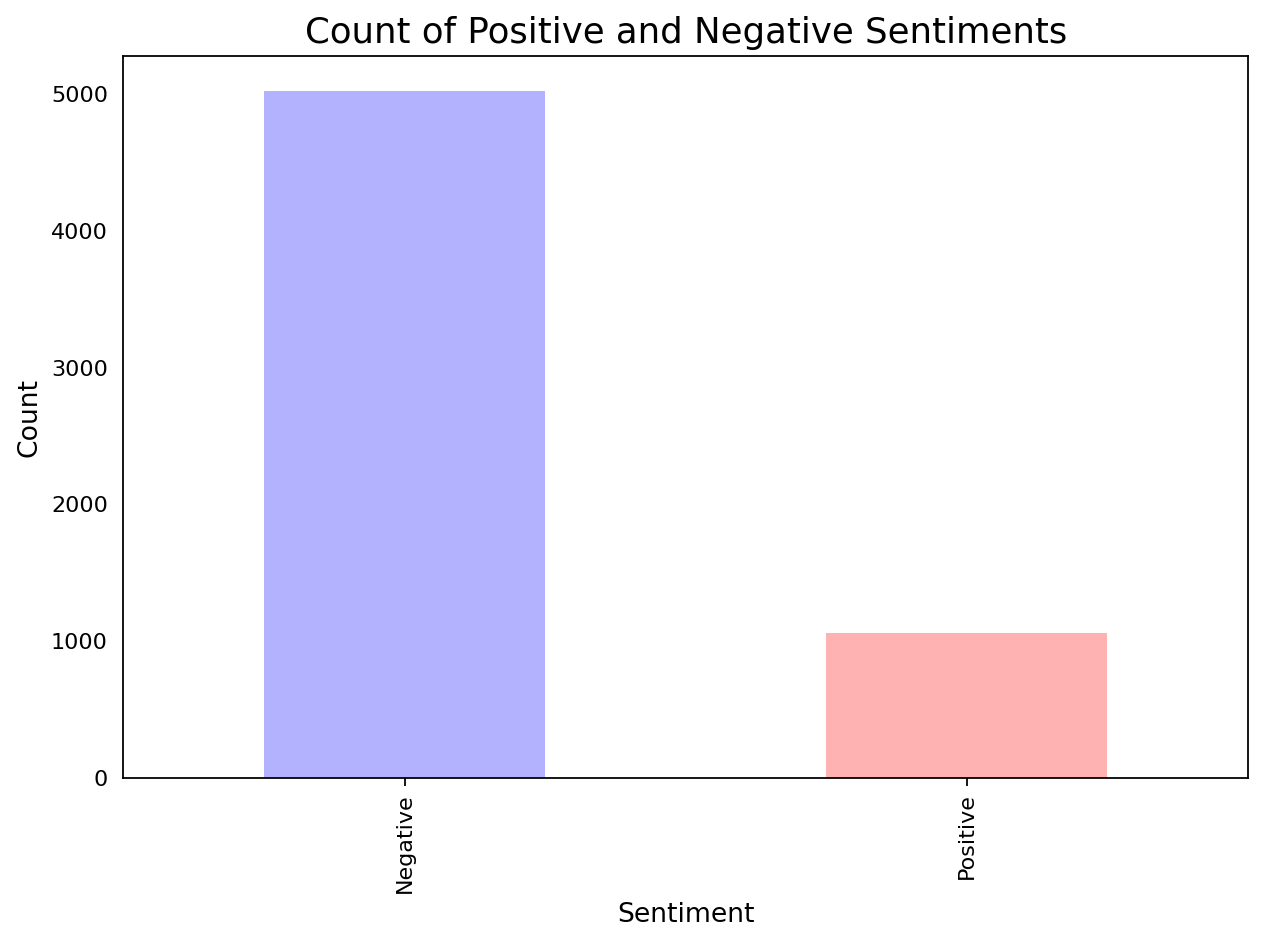

In [18]:
# Count the occurrences of each sentiment
sentiment_counts = df['Sentiment'].value_counts()

# Plot Word Count and Weights of Topic Keywords
fig, ax = plt.subplots(figsize=(8, 6), dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
sentiment_counts.plot(kind='bar', color=['blue', 'red'], ax=ax, alpha=0.3, label='Sentiment Count')
ax.set_title('Count of Positive and Negative Sentiments', fontsize=16)
ax.set_xlabel('Sentiment', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.tick_params(axis='y', left=False)

fig.tight_layout()   
plt.savefig('assets/images/count_of_positive_and_negative_sentiments.png')
plt.show()

In [19]:
sentiment_counts

Sentiment
Negative    5024
Positive    1061
Name: count, dtype: int64

In [20]:
# Combine tokenized words into a single string
df['Words'] = df['final'].apply(lambda x: ' '.join(x))

# Merge DataFrames based on a common identifier (e.g., index)
merged_df = pd.merge(df[['Datetime', 'Words','Sentiment']], df_dominant_topic[['Dominant_Topic']], left_index=True, right_index=True)

# Convert 'Datetime' column into datetime format
merged_df['Datetime'] = pd.to_datetime(merged_df['Datetime'])

# Modify 'datetime' column to include only the year
merged_df['Datetime'] = merged_df['Datetime'].dt.year

# Rename 'datetime' column to 'year'
merged_df = merged_df.rename(columns={'Datetime': 'Year'})

Word cloud for Dominant Topic 1:
Positive Sentiment:


C:\Users\bukan\AppData\Local\Programs\Python\Python311\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


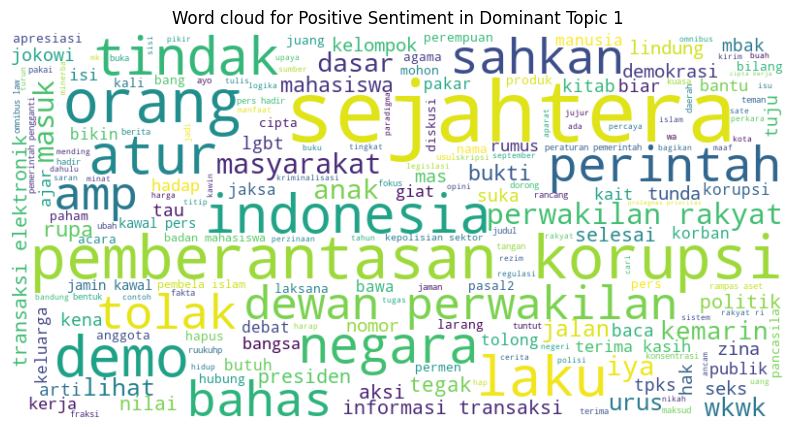

Negative Sentiment:


C:\Users\bukan\AppData\Local\Programs\Python\Python311\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


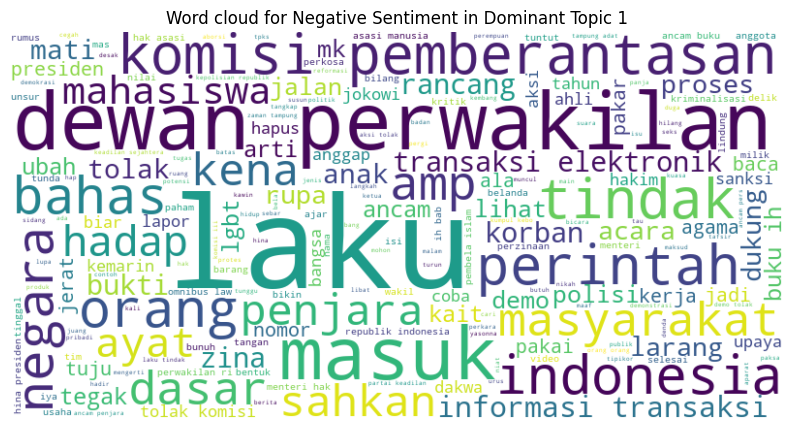

Word cloud for Dominant Topic 2:
Positive Sentiment:


C:\Users\bukan\AppData\Local\Programs\Python\Python311\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


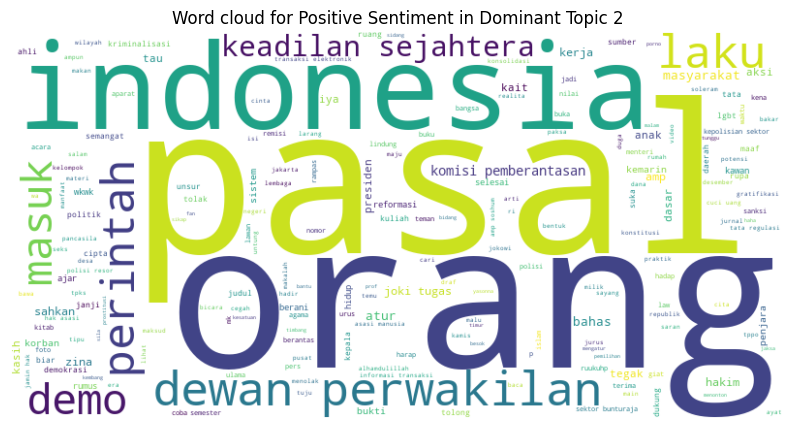

Negative Sentiment:


C:\Users\bukan\AppData\Local\Programs\Python\Python311\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


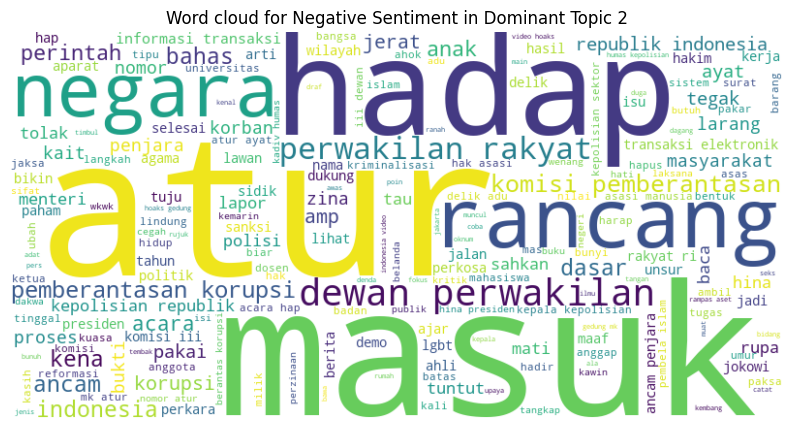

Word cloud for Dominant Topic 0:
Positive Sentiment:


C:\Users\bukan\AppData\Local\Programs\Python\Python311\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


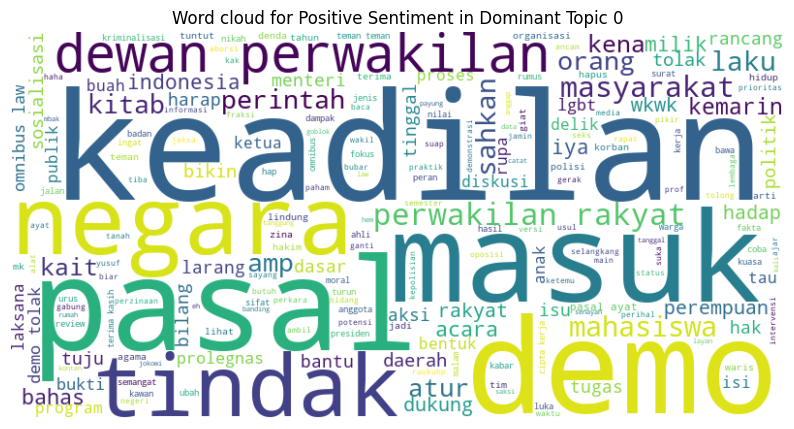

Negative Sentiment:


C:\Users\bukan\AppData\Local\Programs\Python\Python311\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


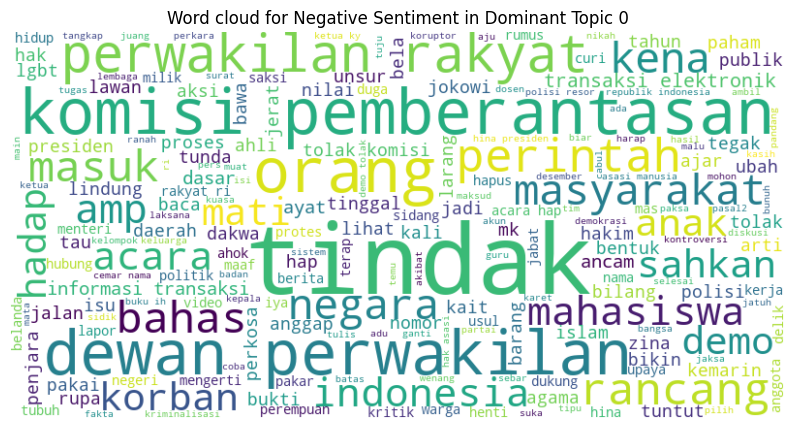

Word cloud for Dominant Topic 3:
Positive Sentiment:


C:\Users\bukan\AppData\Local\Programs\Python\Python311\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


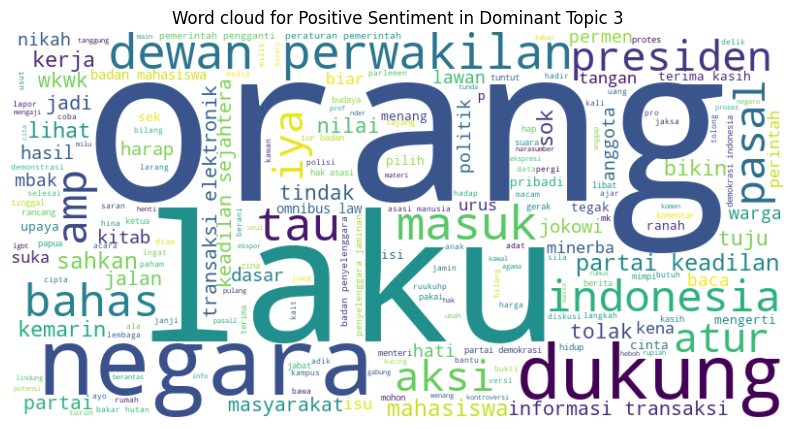

Negative Sentiment:


C:\Users\bukan\AppData\Local\Programs\Python\Python311\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


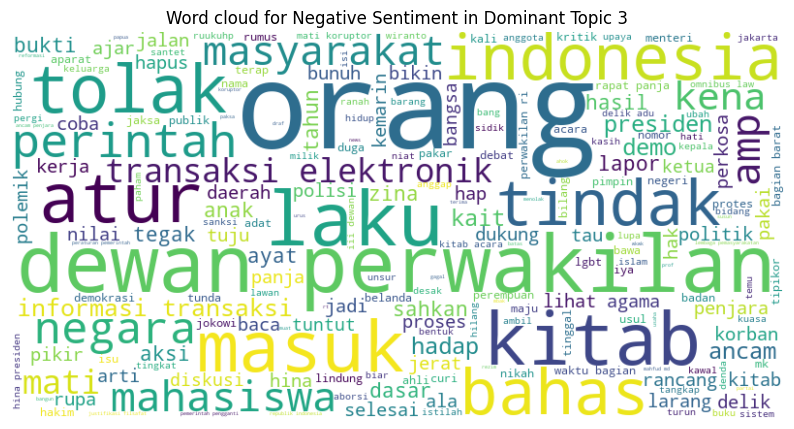

In [28]:
# Function to filter words based on sentiment and topic
def filter_words(sentiment, topic):
    return ' '.join(merged_df[(merged_df['Sentiment'] == sentiment) & (merged_df['Dominant_Topic'] == topic)]['Words'])

# Define the number of top words to exclude
top_words_to_exclude = 12  # Change this number as needed

# Function to filter words based on sentiment and topic while excluding top words
def filter_words_exclude_top(sentiment, topic):
    words = merged_df[(merged_df['Sentiment'] == sentiment) & (merged_df['Dominant_Topic'] == topic)]['Words']
    word_counts = words.str.split(expand=True).stack().value_counts()
    
    top_words = word_counts.head(top_words_to_exclude).index.tolist()
    
    filtered_words = ' '.join([word for word in words.str.split().sum() if word not in top_words])
    return filtered_words

# Function to generate word cloud
def generate_wordcloud(words, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    filename = f"assets/images/{title.lower().replace(' ', '_')}.png"
    plt.savefig(filename, bbox_inches='tight', dpi=160)
    plt.show()

# Generate word clouds for each dominant topic's sentiment while excluding top words
topics = merged_df['Dominant_Topic'].unique()
for topic in topics:
    print(f"Word cloud for Dominant Topic {topic}:")
    positive_words = filter_words_exclude_top('Positive', topic)
    negative_words = filter_words_exclude_top('Negative', topic)

    print("Positive Sentiment:")
    generate_wordcloud(positive_words, f"Word cloud for Positive Sentiment in Dominant Topic {topic}")

    print("Negative Sentiment:")
    generate_wordcloud(negative_words, f"Word cloud for Negative Sentiment in Dominant Topic {topic}")

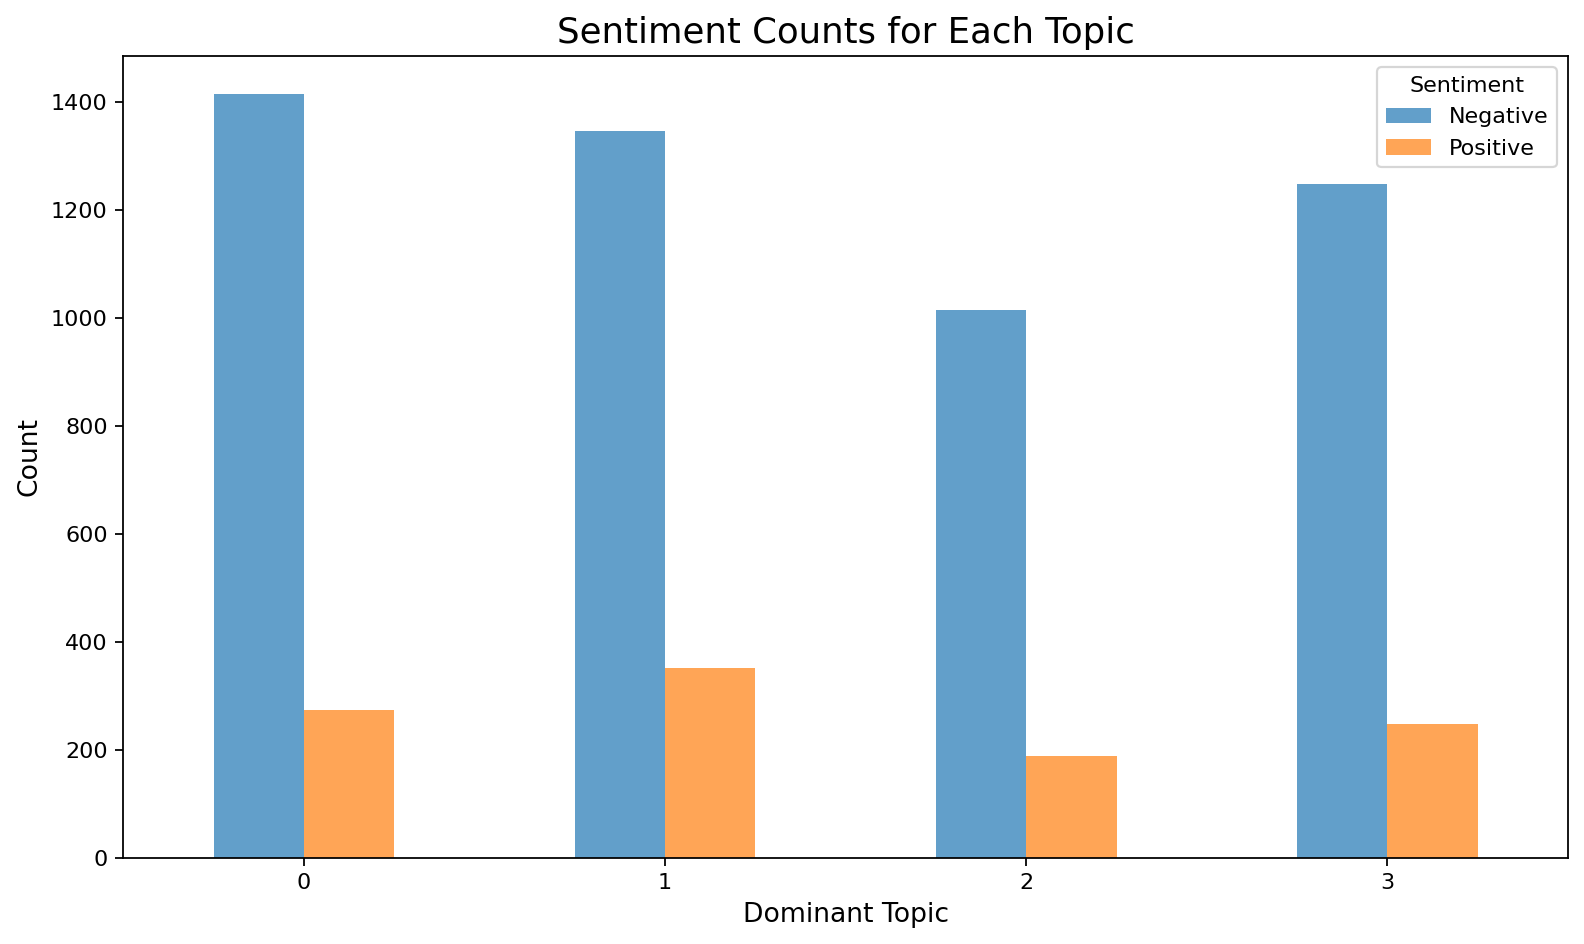

In [22]:
# Grouping by 'Dominant_Topic' and 'Sentiment', and then counting occurrences
sentiment_counts_per_topic = merged_df.groupby(['Dominant_Topic', 'Sentiment']).size().unstack(fill_value=0)

# Plotting with customized styling
fig, ax = plt.subplots(figsize=(10, 6), dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
sentiment_counts_per_topic.plot(kind='bar', ax=ax, color=cols, alpha=0.7)
ax.set_title('Sentiment Counts for Each Topic', fontsize=16)
ax.set_xlabel('Dominant Topic', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.legend(title='Sentiment', loc='upper right', fontsize=10)
ax.tick_params(axis='x', rotation=0)

fig.tight_layout()   
plt.savefig('assets/images/sentiment_counts_for_each_topic.png')
plt.show()

In [23]:
sentiment_counts_per_topic

Sentiment,Negative,Positive
Dominant_Topic,,
0,1414,274
1,1346,351
2,1014,188
3,1249,248


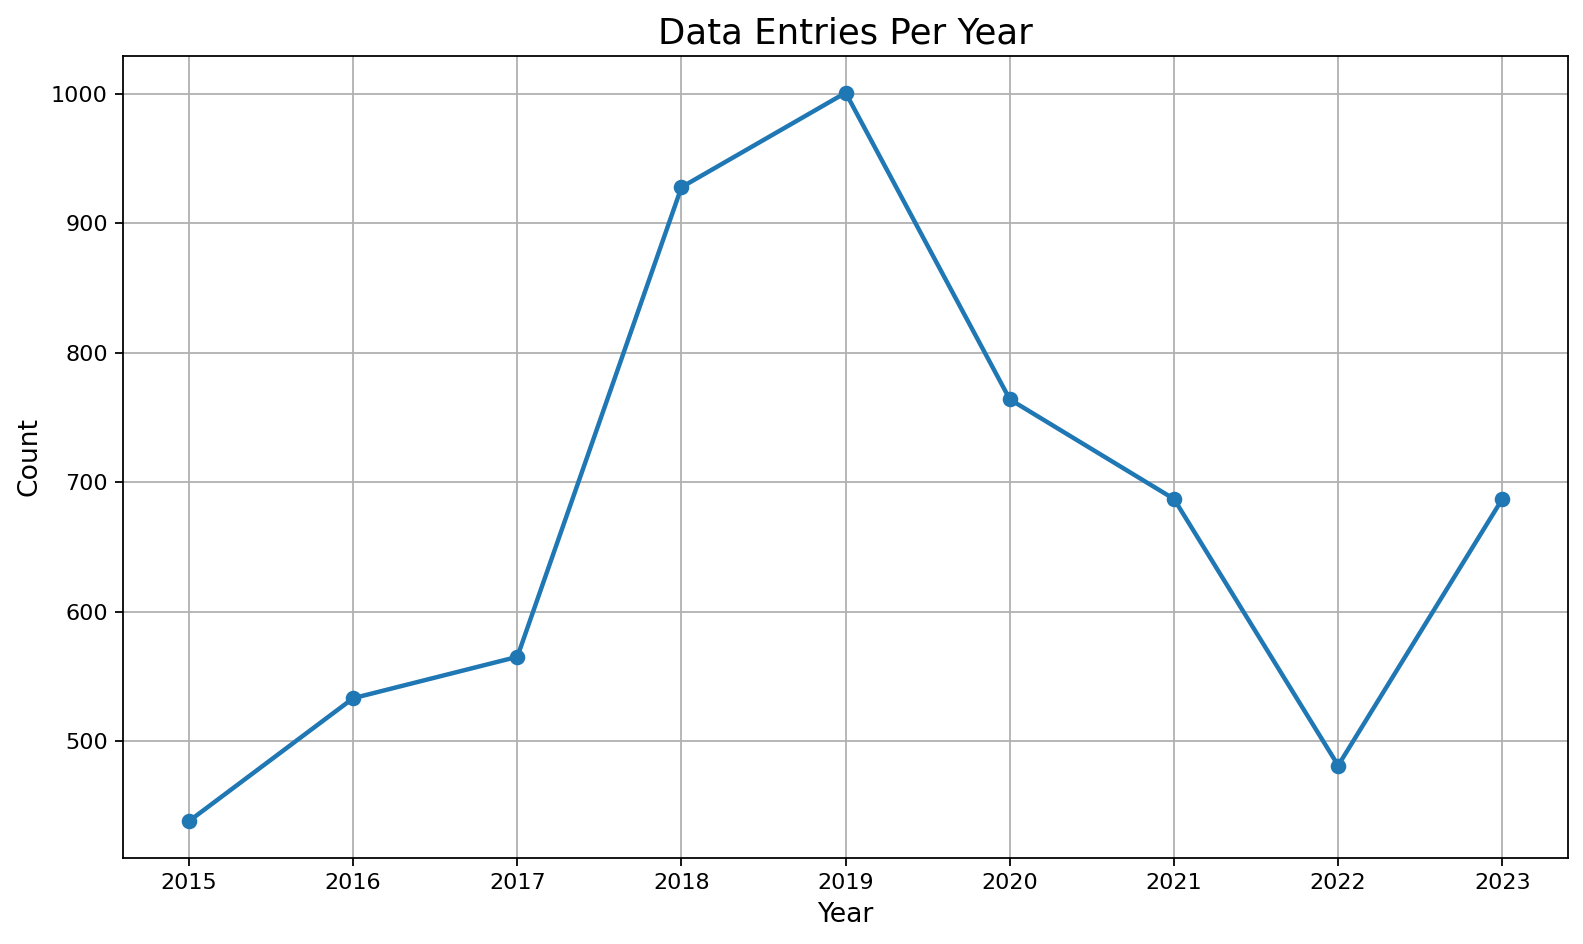

In [24]:
# Count occurrences of each year
year_counts = merged_df['Year'].value_counts().sort_index()

# Get a list of colors from TABLEAU_COLORS
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]

# Create a line plot for yearly counts with customized styling using TABLEAU_COLORS
plt.figure(figsize=(10, 6), dpi=160)
year_counts.plot(kind='line', marker='o', color=cols[0], linestyle='-', linewidth=2)  # Choose the first color
plt.title('Data Entries Per Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(True)
plt.xticks(year_counts.index)  # Set x-axis ticks as the years

plt.tight_layout()
plt.savefig('assets/images/data_entries_per_year.png')
plt.show()

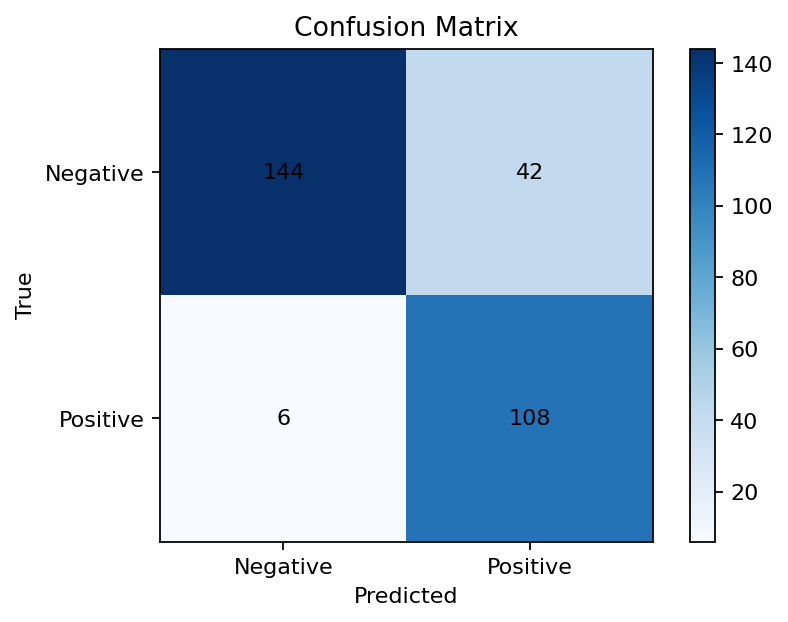

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Define the values for the confusion matrix
tn = 144  # True Negative
fn = 6    # False Negative
tp = 108  # True Positive
fp = 42   # False Positive

# Create the confusion matrix
conf_matrix = np.array([[tn, fp],
                        [fn, tp]])

# Display the confusion matrix
labels = ['Negative', 'Positive']
plt.figure(figsize=(6, 4), dpi=160)  # Set dpi to 160
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()

# Add annotations to the confusion matrix cells
for i in range(len(labels)):
    for j in range(len(labels)):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment='center', verticalalignment='center', color='black')

plt.xticks([0, 1], labels)
plt.yticks([0, 1], labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
